# Sympy
Sympy est une autre bibliothèque Python pour le calcul formel ou calcul symbolique dans le monde de l'informatique, contrairement à Numpy qui fait des calculs numérique, Sympy fait des calculs symboliques. 

Il existe plusiers façon d'importer la bibliothèque **Sympy**,

In [7]:
import sympy as smp


Ou bien,

In [18]:
from sympy import Symbol, Function, Integral, pprint, exp, sin, solve

**Note** : la différence entre les deux est que la première importation permet d'importer toute la bibliothèque sous un gros objet *smp* qui contient des membres ou fonctions permetant la contruction et le calcul symbolique par des appel de fonctions qui renvoient des objets, la deuxième permet d'importer seulement des classes avec lesquelles on instancie des objets,


#### Première utilisation
Dans le cas de la deuxième façon d'importer la bibliothèque,

In [9]:
a = Symbol("a")
b = Symbol("b")

e= (a+b)**3
e

(a + b)**3

#### Distribution 

In [10]:
e.expand(e)

a**3 + 3*a**2*b + 3*a*b**2 + b**3

In [13]:
x= Symbol("x")
sin(x)

sin(x)

In [15]:
y = x**2 + 4*x +3
y

x**2 + 4*x + 3

In [21]:
f = y**2
z

(x**2 + 4*x + 3)**2

#### Factorisation

In [22]:
f.factor()

(x + 1)**2*(x + 3)**2

#### Résolution 
la fonction `solve(f,x)` résoue la fonction *f(x)=0*,

In [23]:
solve(f,x)

[-3, -1]

résoudre la fonction *sin(x)=0*

In [24]:
solve(sin(x),x)

[0, pi]

Une autre équation *f(x)=x²+1=0* 

In [25]:
solve(x**2+1,x)

[-I, I]

Définir un symbole positif,

In [26]:
x = Symbol("x", real=True, positive=True)
solve(x**2+1,x)

[]

#### exemple d'integration

In [29]:
x = Symbol("x")
f = Function("f")

pprint(x**exp(x))

pprint(Integral(f(x),x), use_unicode=True)

 ⎛ x⎞
 ⎝ℯ ⎠
x    
⌠        
⎮ f(x) dx
⌡        


Dans le cas de la première façon d'importation, 

In [30]:
x = smp.symbols("x")
f = x**smp.exp(x) 
smp.pprint(f)
   
smp.pprint(smp.integrate(f, x), use_unicode=True)

 ⎛ x⎞
 ⎝ℯ ⎠
x    
⌠         
⎮  ⎛ x⎞   
⎮  ⎝ℯ ⎠   
⎮ x     dx
⌡         


On peut définir plusieurs symboles à la fois, 

In [33]:
l, m, n = smp.symbols('l m n')

In [35]:
F = l**2+smp.sin(n)*m
F

l**2 + m*sin(n)

In [38]:
l_sol= smp.solve(F,l)
l_sol

[-sqrt(-m*sin(n)), sqrt(-m*sin(n))]

In [40]:
m_sol = smp.solve(F,m)
m_sol

[-l**2/sin(n)]

In [41]:
n_sol = smp.solve(F,n)
n_sol

[asin(l**2/m) + pi, -asin(l**2/m)]

Si on veut évaluer numériquement la fonction pour pouvoir la tracer on utilise la fonction `lambdify()`

In [43]:
func = n_sol[0] 
func

asin(l**2/m) + pi

In [45]:
import matplotlib.pyplot as plt

In [81]:
expr_func = smp.lambdify([l,m], func)
# évaluer en donnant deux valeurs respectivement pour l et m
expr_func(0.01,2)


3.141642653589814

In [56]:
import numpy as np

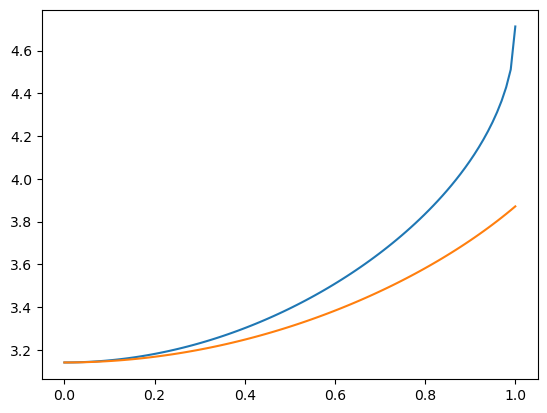

In [90]:
# on génère un vecteur de 100 éléments 
l_num = np.linspace(0,1,100)
m_num = 1
plt.plot(l_num, expr_func(l_num,m_num))
m_num = 1.5
plt.plot(l_num, expr_func(l_num,m_num))
plt.show()

In [96]:
F

l**2 + m*sin(n)

On peut substituer dans une expression multivariables avec la fonction `subs()` qui prend un vecteur, par exemple je veux changer la variable m par cos(n)

In [97]:
F.subs([(m, smp.cos(n))])

l**2 + sin(n)*cos(n)

si je veux rajouter une deuxième substitution après la première qui me permettrai de passer la variable n à m, 

In [99]:
# On reprend l'expression d'origine
F = l**2+smp.sin(n)*m
F.subs([(m, smp.cos(n)),(n,m)])

l**2 + sin(m)*cos(m)